# Plot info

In [1]:
#%matplotlib notebook
%matplotlib widget
import os
import json_lines
from pathlib import Path
import matplotlib.pyplot as plt
import json_log_plots
import numpy as np
import mplcursors

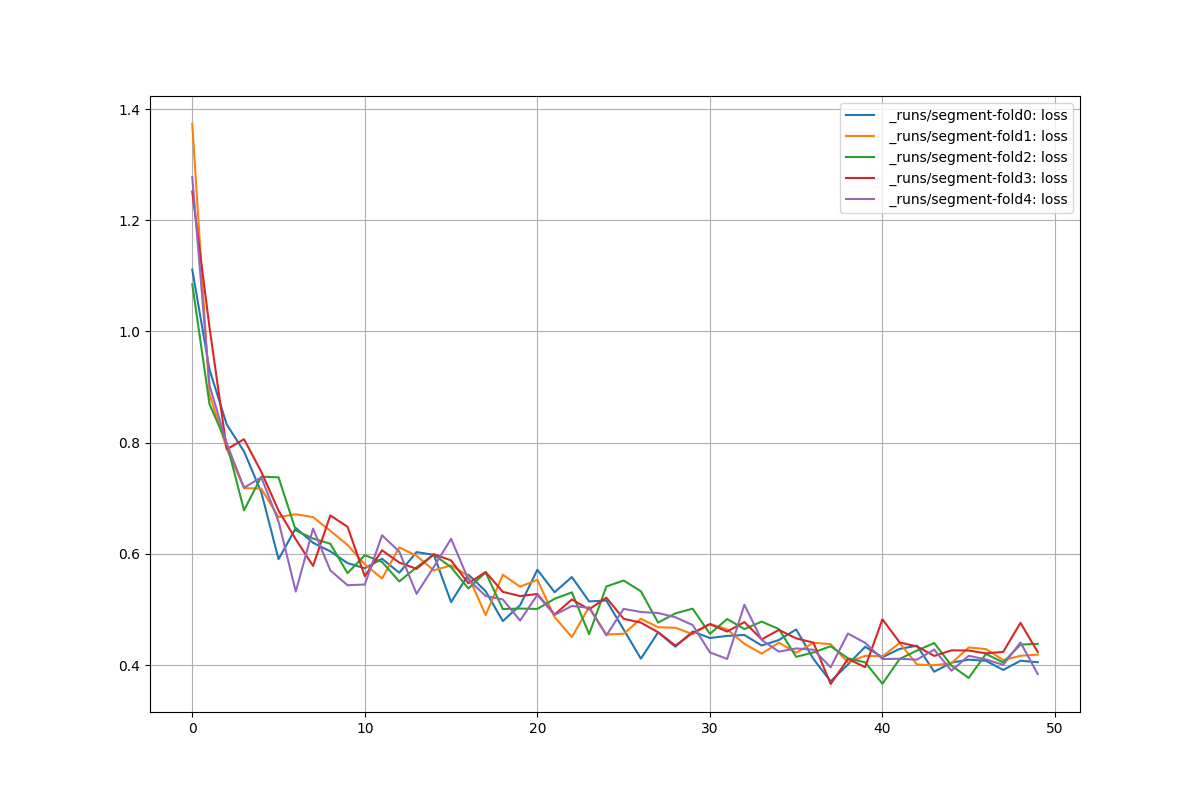

In [2]:
#https://github.com/lopuhin/json-log-plots/blob/master/json_log_plots/log.py
#json_log_plots.plot('../_runs/segment-fold0', '../_runs/segment-fold1', 'loss', 'loss_box_reg')
#######Valores con rgb shift!!!
ruta= '_runs/segment-fold'
json_log_plots.plot(ruta+str(0),ruta+str(1),ruta+str(2),ruta+str(3),ruta+str(4), 'loss')

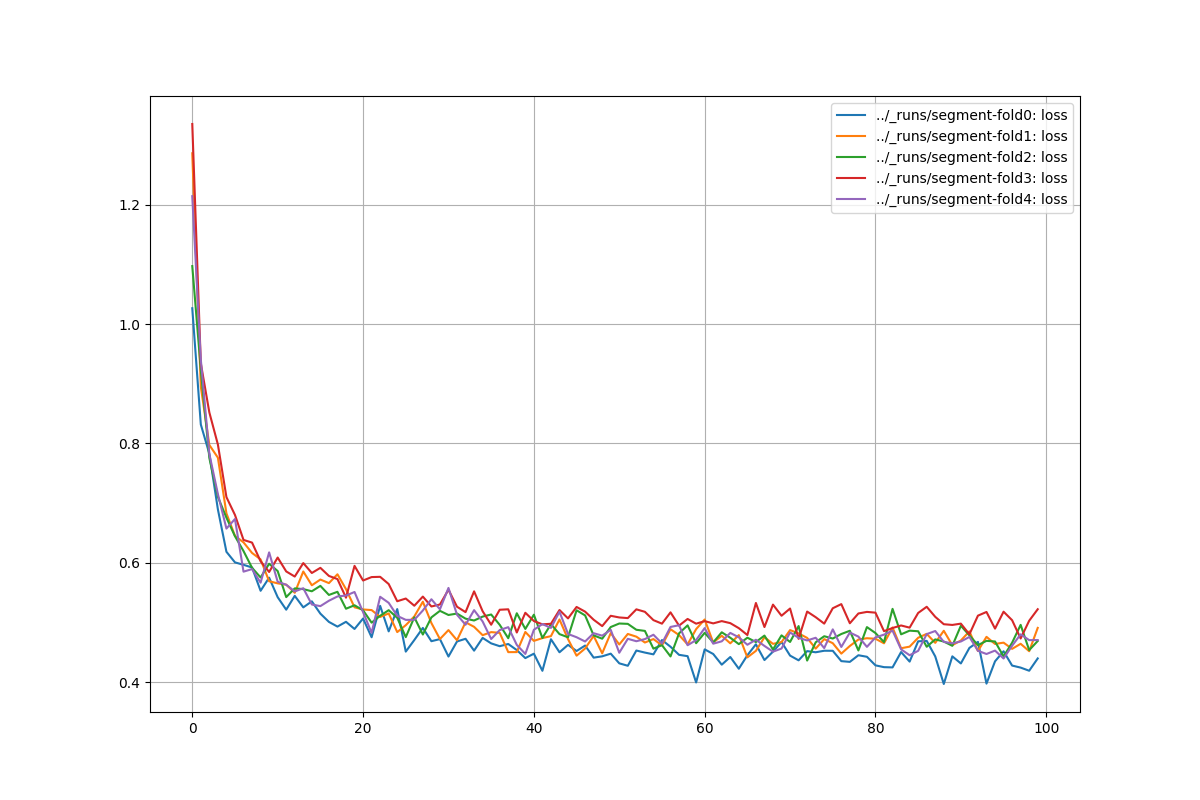

In [32]:
###Valores actuales!! train_initial_size=2000
ruta= '../_runs/segment-fold'
json_log_plots.plot(ruta+str(0),ruta+str(1),ruta+str(2),ruta+str(3),ruta+str(4), 'loss')

In [28]:
path = Path('../_runs/segment-fold0')
#NAME='json-log-plots_0.log' #Original loss (40 epochs)
NAME='json-log-plots.log'

for filename in os.listdir(path):
    if filename == NAME:
        #f  = open(os.path.join(path, filename), "r")
        #a=f.read()
        #data = json.loads(a)
        with json_lines.open(path / filename, broken=True) as f:
            events = list(f)
print(events)

[{'dt': '2022-08-01T15:54:12.327977', 'loss': 1.0264867300560339, 'loss_box_reg': 0.25855461871583346, 'loss_classifier': 0.4360050622649564, 'loss_objectness': 0.20854378066975116, 'loss_rpn_box_reg': 0.12338326840549294, 'lr': 0.0075024999812437505, 'step': 0}, {'det rate': 0.4899598393574297, 'dt': '2022-08-01T15:54:13.538051', 'f1': 0.6394608760763759, 'fn': 889, 'fp': 74, 'fppc': 0.042455536431440045, 'prec': 0.9202586206896551, 'step': 0, 'tp': 854}, {'dt': '2022-08-01T15:54:17.022222', 'loss': 0.8316716147821386, 'loss_box_reg': 0.31604772248241697, 'loss_classifier': 0.2973323829489336, 'loss_objectness': 0.1199304421228023, 'loss_rpn_box_reg': 0.09836106722798572, 'lr': 0.009999999975, 'step': 1}, {'det rate': 0.7475616752725186, 'dt': '2022-08-01T15:54:18.332090', 'f1': 0.8213047589032462, 'fn': 440, 'fp': 127, 'fppc': 0.07286288009179576, 'prec': 0.9111888111888112, 'step': 1, 'tp': 1303}, {'dt': '2022-08-01T15:54:21.852556', 'loss': 0.7825693391144426, 'loss_box_reg': 0.280

In [29]:
def plott(v,data, avr=True):
    plot_v =[]
    step_max=v[-1]['step']
    print(v[-1])
    if avr:
        for i in range(step_max):
                val= []
                for e in v:
                    if e['step']== i:
                    #print(e['loss'])
                        val.append(e[data])

                plot_v.append(np.average(val))
    else:
        step_max=len(v)
        for e in v:
            plot_v.append(e[data])
    
    plt.figure(figsize=(12,8))
    #plt.plot((len(value),value))
    plt.plot(range(step_max),plot_v)
    plt.grid()
    plt.title(data)
    #mplcursors.cursor()
    plt.show()
    #print(plot_v)

In [30]:
def PlotEvents(events, data, avegare):
    metrics={'f1','fp', 'fn','tp','det rate','fppc','prec'}
    v1, v2= [], []
    for e in events:
        if not metrics <= e.keys():
            v1.append(e)
        else:
            v2.append(e)
    if data in metrics:
        plott(v2, data, avr=avegare)
    else:
        plott(v1, data, avr=avegare)

{'dt': '2022-08-01T16:01:43.820329', 'loss': 0.4395439553203905, 'loss_box_reg': 0.15601310327182327, 'loss_classifier': 0.191309295116419, 'loss_objectness': 0.019521980497609902, 'loss_rpn_box_reg': 0.0726995764345383, 'lr': 0.0009999999975, 'step': 99}


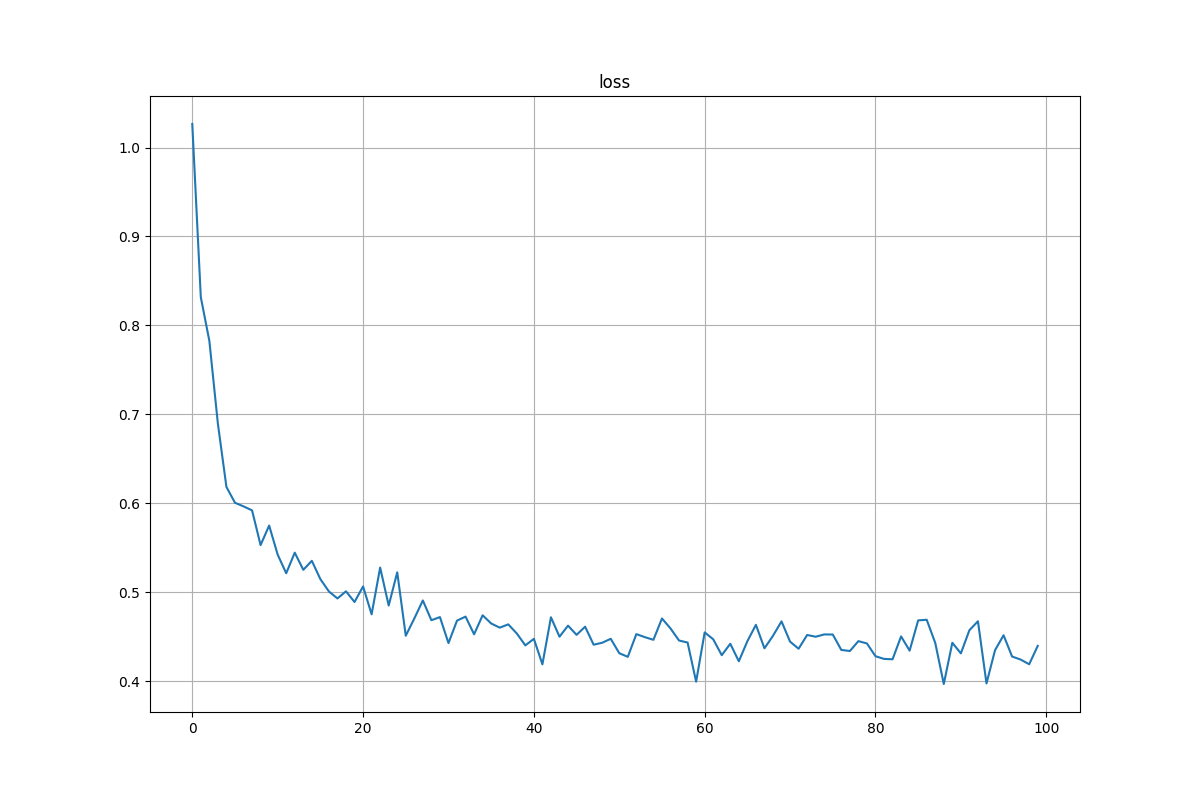

In [31]:
PlotEvents(events,'loss',False)